In [1]:
#Importing Packages
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from math import sqrt
from scipy.interpolate import interp1d

In [2]:
#Import CSVs to pandas data frame,
df = pd.read_csv('GoldOilSilverPriceHistory2Yrs8_24_2020.csv')

#Coverting Date column to Date Time object and sorting chronologically.
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date')

#Set date as index.
df.set_index('Date',inplace=True)


In [3]:
#Fill NaNs for needed columns.
df['Oil Last'].fillna(method = 'ffill', inplace=True)
df['Silver Last'].fillna(method = 'ffill', inplace=True)
df['S&P Last'].fillna(method = 'ffill', inplace=True)

In [4]:
df.describe()

,Gold Open,Gold High,Gold Low,Gold Last,Gold Change,Oil Open,Oil High,Oil Low,Oil Last,Silver Open,...,USD Open,USD High,USD Low,USD Last,S&P Open,S&P High,S&P Low,S&P Last,S&P Change,S&P Volume
count,517.000000,517.000000,517.000000,517.000000,517.000000,503.000000,503.000000,503.000000,517.000000,469.000000,...,517.000000,517.000000,517.000000,517.000000,305.000000,305.000000,305.000000,517.000000,305.000000,3.050000e+02
mean,1463.266480,1473.282476,1454.805629,1464.513772,1.438298,12.641525,12.735409,12.510067,12.645980,17.154780,...,97.234487,97.487041,96.975803,97.225977,3030.230492,3053.190328,3006.500492,2982.153868,1.681639,2.755956e+05
std,204.496029,208.375042,201.180643,205.254184,14.753362,3.645810,3.625421,3.682707,3.619584,2.456672,...,1.582804,1.597737,1.567316,1.584447,216.879101,202.170038,230.725074,176.579084,51.767784,6.340782e+05
min,1182.710000,1191.600000,1181.060000,1182.290000,-115.160000,3.130020,3.177520,3.130020,3.177520,12.045000,...,92.200000,92.820000,92.120000,92.200000,2229.500000,2375.500000,2165.500000,2213.250000,-279.000000,0.000000e+00
25%,1286.710000,1292.400000,1282.120000,1286.310000,-4.730000,10.882000,10.980000,10.678000,10.866880,15.576000,...,96.480000,96.700000,96.210000,96.490000,2925.250000,2938.500000,2914.400000,2910.250000,-13.000000,0.000000e+00
50%,1464.190000,1473.320000,1458.920000,1464.260000,1.710000,12.355000,12.391300,12.224000,12.409700,16.710000,...,97.280000,97.470000,97.020000,97.240000,3014.250000,3029.500000,3005.750000,2910.250000,5.000000,2.400000e+01
75%,1577.550000,1595.260000,1571.180000,1581.010000,8.170000,14.990000,15.142500,14.947550,14.948000,18.025000,...,98.120000,98.320000,97.890000,98.120000,3198.000000,3216.750000,3179.000000,3070.750000,24.250000,5.726000e+03
max,2062.960000,2070.480000,2035.100000,2063.020000,69.160000,19.750000,19.750000,19.619800,19.619800,29.235000,...,102.970000,102.990000,101.650000,102.980000,3398.750000,3429.500000,3393.500000,3427.500000,227.500000,2.997253e+06


In [5]:
#Setting X and Y variables for training.
x = df[['Oil Last', 'Silver Last', 'USD Last', 'S&P Last']]
y = df['Gold Open']

In [6]:
#Implementing TTS.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)


In [7]:
#Scaling x-values.
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#Importing and implementing LR model.
linreg = LinearRegression(normalize = True)
linreg.fit(x_train, y_train)

LinearRegression(normalize=True)

In [9]:
#Load predicted values
y_pred = linreg.predict(x_test)

In [10]:
#Loading actual vs predicted value into dataframe and calculating residuals.
residual = (y_test - y_pred)
df_lin_test = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred,'Residual': residual})
df_lin_test.head(25)

,Actual,Predicted,Residual
Date,,,
2019-08-08,1501.01,1546.746009,-45.736009
2020-04-20,1680.65,1557.686824,122.963176
2020-02-19,1601.23,1643.861190,-42.631190
2019-10-16,1480.99,1577.211722,-96.221722
2019-10-11,1493.38,1594.940890,-101.560890
2019-07-17,1405.98,1354.991164,50.988836
2020-01-14,1547.77,1558.081382,-10.311382
2020-06-18,1725.77,1558.271787,167.498213
2019-07-01,1411.29,1331.794417,79.495583


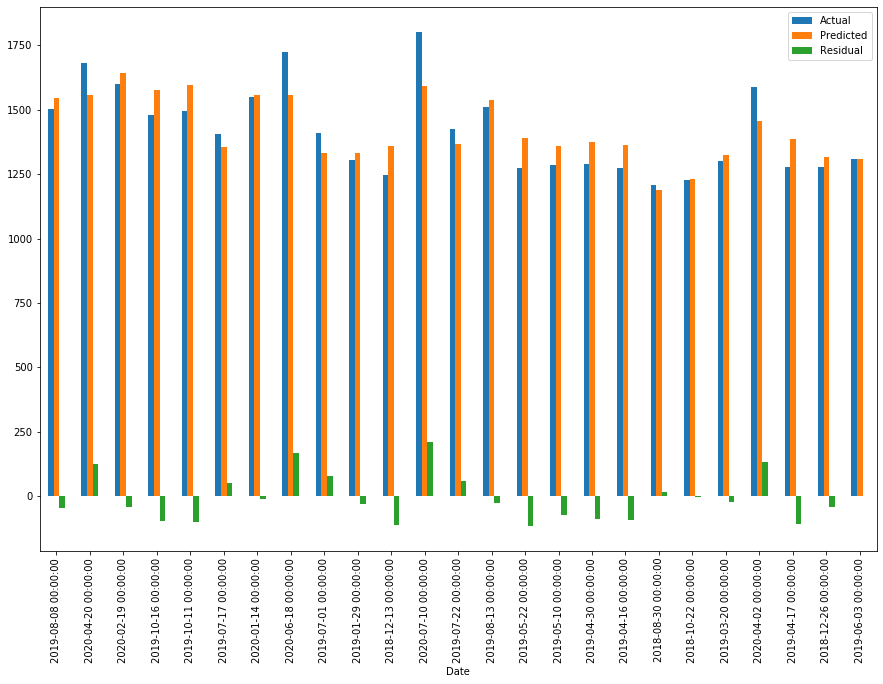

In [11]:
#Creating bar chart of predicted vs actual values.
df_lin_graph = df_lin_test.head(25)
df_lin_graph_out = df_lin_graph.plot(kind='bar', figsize=(15,10))
df_lin_graph_out

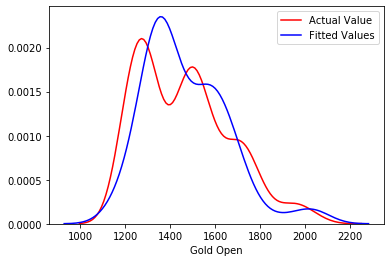

In [12]:
import seaborn as sns

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

Text(0, 0.5, 'Residual')

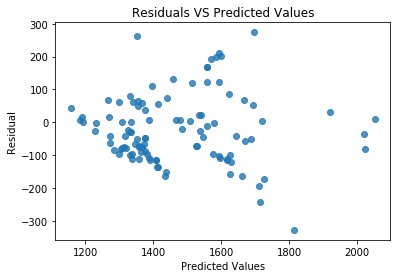

In [13]:
#Creating residual and predicted plot and looking for patterns.
sns.regplot(y_pred, residual, fit_reg=False)
plt.title('Residuals VS Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')

Text(0, 0.5, 'Count')

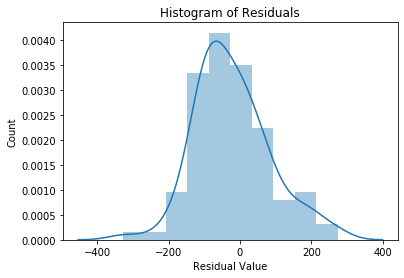

In [14]:
#Creating histogram of residuals and looking for patterns.
sns.distplot(residual, bins = 10)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')

In [15]:
#Calculating root mean squared error.
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('The Mean Squared Error Is: ' + str(rmse))

The Mean Squared Error Is: 106.65041651637968


In [16]:
#Calculating model score.
print('The Model Score Is: ' + str(linreg.score(x_test, y_test)))

The Model Score Is: 0.7309519969810709
